In [10]:
!pip install yfinance

In [11]:
import yfinance as yf

# 提取特斯拉的股票數據
ticker = 'TSLA'
tesla_data = yf.download(ticker)

# 重置索引
tesla_data.reset_index(inplace=True)

# 保存數據到CSV文件
tesla_data.to_csv('tesla_data.csv', index=False)

# 顯示前五行
print(tesla_data.head())


[*********************100%%**********************]  1 of 1 completed


        Date      Open      High       Low     Close  Adj Close     Volume
0 2010-06-29  1.266667  1.666667  1.169333  1.592667   1.592667  281494500
1 2010-06-30  1.719333  2.028000  1.553333  1.588667   1.588667  257806500
2 2010-07-01  1.666667  1.728000  1.351333  1.464000   1.464000  123282000
3 2010-07-02  1.533333  1.540000  1.247333  1.280000   1.280000   77097000
4 2010-07-06  1.333333  1.333333  1.055333  1.074000   1.074000  103003500


In [29]:
!pip install requests beautifulsoup4 pandas


In [35]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

# 定義要抓取的目標URL
url = 'https://www.macrotrends.net/stocks/charts/TSLA/tesla/revenue'

# 發送HTTP請求來獲取網頁內容
response = requests.get(url)
if response.status_code != 200:
    raise Exception(f"Failed to load page {url}")

# 使用BeautifulSoup解析HTML內容
soup = BeautifulSoup(response.content, 'html.parser')

# 找到收入表格
tesla_revenue_table = soup.find_all('table', {'class': 'historical_data_table table'})
if not tesla_revenue_table:
    raise Exception("Failed to find the Tesla Quarterly Revenue table")
tesla_revenue_table = tesla_revenue_table[0]

# 解析表格數據
rows = tesla_revenue_table.find_all('tr')
data = []
for row in rows[1:]:  # 跳過表頭
    cols = row.find_all('td')
    cols = [ele.text.strip() for ele in cols]
    data.append(cols)

# 創建數據框
tesla_revenue = pd.DataFrame(data, columns=['Date', 'Revenue'])
tesla_revenue['Revenue'] = tesla_revenue['Revenue'].str.replace(',', '').str.replace('$', '').astype(float)

# 顯示數據框的最後五行
print(tesla_revenue.tail())


Exception: Failed to load page https://www.macrotrends.net/stocks/charts/TSLA/tesla/revenue

In [36]:
import yfinance as yf
import pandas as pd

# 提取 GameStop (GME) 的股票数据
ticker = 'GME'
gme_data = yf.download(ticker)

# 重置索引
gme_data.reset_index(inplace=True)

# 保存数据到 CSV 文件
gme_data.to_csv('gme_data.csv', index=False)

# 显示数据框的前五行
print(gme_data.head())



[*********************100%%**********************]  1 of 1 completed

        Date     Open     High      Low    Close  Adj Close    Volume
0 2002-02-13  2.40625  2.51500  2.38125  2.51250   1.691667  76216000
1 2002-02-14  2.54375  2.54875  2.48125  2.50000   1.683250  11021600
2 2002-02-15  2.50000  2.50625  2.46250  2.48750   1.674834   8389600
3 2002-02-19  2.47500  2.47500  2.34375  2.38750   1.607504   7410400
4 2002-02-20  2.40000  2.46875  2.38125  2.46875   1.662210   6892800


In [37]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

# 定义要抓取的目标URL
url = 'https://www.macrotrends.net/stocks/charts/GME/gamestop/revenue'

# 发送HTTP请求来获取网页内容
response = requests.get(url)
if response.status_code != 200:
    raise Exception(f"Failed to load page {url}")

# 使用BeautifulSoup解析HTML内容
soup = BeautifulSoup(response.content, 'html.parser')

# 找到收入表格
table = soup.find('table', {'class': 'historical_data_table'})
if table is None:
    raise Exception("Failed to find the revenue table")

# 解析表格数据
data = []
for row in table.find_all('tr')[1:]:  # 跳过表头
    cols = row.find_all('td')
    cols = [ele.text.strip() for ele in cols]
    data.append(cols)

# 创建数据框
gme_revenue = pd.DataFrame(data, columns=['Date', 'Revenue'])

# 清理数据（去掉非数字字符）
gme_revenue['Revenue'] = gme_revenue['Revenue'].str.replace(',', '').str.replace('$', '').astype(float)

# 显示数据框的最后五行
print(gme_revenue.tail())


Exception: Failed to load page https://www.macrotrends.net/stocks/charts/GME/gamestop/revenue

In [38]:
pip install matplotlib


Note: you may need to restart the kernel to use updated packages.


[*********************100%%**********************]  1 of 1 completed


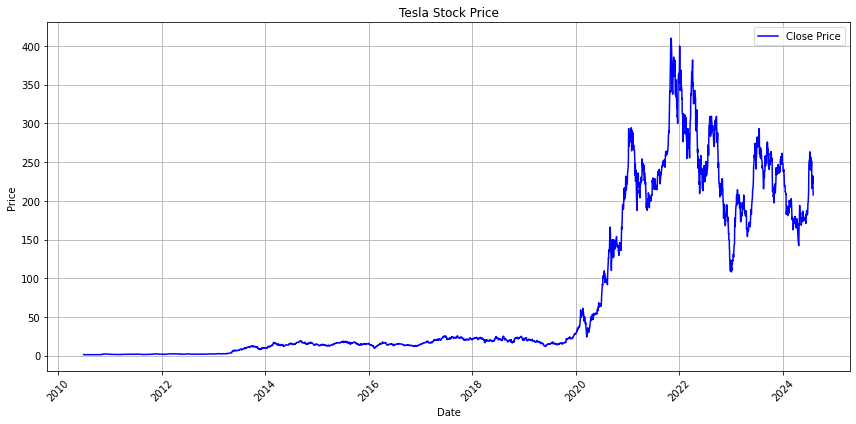

In [39]:
import yfinance as yf
import matplotlib.pyplot as plt

def make_graph(data, title):
    """
    绘制股票数据图表

    参数:
    - data: pandas DataFrame，包含股票数据
    - title: 字符串，图表标题
    """
    # 确保数据中包含 'Date' 和 'Close' 列
    if 'Date' not in data.columns or 'Close' not in data.columns:
        raise ValueError("数据框中必须包含 'Date' 和 'Close' 列")
    
    # 设置日期为 x 轴，收盘价为 y 轴
    plt.figure(figsize=(12, 6))
    plt.plot(data['Date'], data['Close'], label='Close Price', color='blue')
    
    # 添加标题和标签
    plt.title(title)
    plt.xlabel('Date')
    plt.ylabel('Price')
    
    # 显示图例
    plt.legend()
    
    # 显示图表
    plt.grid(True)
    plt.xticks(rotation=45)
    plt.tight_layout()  # 自动调整布局以适应标签
    plt.show()

# 提取特斯拉的股票数据
ticker = 'TSLA'
tesla_data = yf.download(ticker)

# 重置索引，确保 'Date' 列存在
tesla_data.reset_index(inplace=True)

# 使用 make_graph 函数绘制图表
make_graph(tesla_data, 'Tesla Stock Price')


In [40]:
pip install yfinance matplotlib


Note: you may need to restart the kernel to use updated packages.


[*********************100%%**********************]  1 of 1 completed


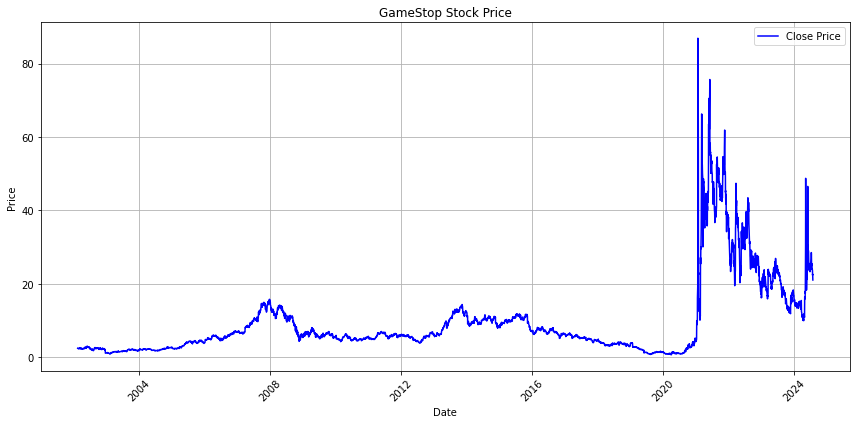

In [41]:
import yfinance as yf
import matplotlib.pyplot as plt

def make_graph(data, title):
    """
    绘制股票数据图表

    参数:
    - data: pandas DataFrame，包含股票数据
    - title: 字符串，图表标题
    """
    # 确保数据中包含 'Date' 和 'Close' 列
    if 'Date' not in data.columns or 'Close' not in data.columns:
        raise ValueError("数据框中必须包含 'Date' 和 'Close' 列")
    
    # 设置日期为 x 轴，收盘价为 y 轴
    plt.figure(figsize=(12, 6))
    plt.plot(data['Date'], data['Close'], label='Close Price', color='blue')
    
    # 添加标题和标签
    plt.title(title)
    plt.xlabel('Date')
    plt.ylabel('Price')
    
    # 显示图例
    plt.legend()
    
    # 显示图表
    plt.grid(True)
    plt.xticks(rotation=45)
    plt.tight_layout()  # 自动调整布局以适应标签
    plt.show()

# 提取 GameStop (GME) 的股票数据
ticker = 'GME'
gme_data = yf.download(ticker)

# 重置索引，确保 'Date' 列存在
gme_data.reset_index(inplace=True)

# 使用 make_graph 函数绘制图表
make_graph(gme_data, 'GameStop Stock Price')
